In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [5]:
df.duplicated().sum()

0

In [6]:
df=df.drop(['CarName'],axis=1)

In [7]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
#we have to detect and treat outliers
cat_cols=['symboling','wheelbase','carwidth','carlength','carwidth','carheight','stroke',
'compressionratio','horsepower','peakrpm', 'citympg', 'highwaympg'
]
#function for treating outliers
def treat_outliers(dataset,columns):
    for col in columns:
        Q1=dataset[col].quantile(0.25)
        Q2=dataset[col].quantile(0.75)
        IQR=Q2-Q1
        lower_bound=Q1- 1.5 * IQR
        upper_bound=Q2 + 1.5 * IQR
        # cap the outliers
        dataset[col]=dataset[col].apply(lambda x:upper_bound if x > upper_bound else(lower_bound if 
                                                                                    x < lower_bound else x))
    return dataset

#apply the function
df=treat_outliers(df,cat_cols)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fueltype']=le.fit_transform(df['fueltype'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['doornumber']=le.fit_transform(df['doornumber'])
df['carbody']= le.fit_transform(df['carbody'])
df['drivewheel']= le.fit_transform(df['drivewheel'])
df['enginelocation']= le.fit_transform(df['enginelocation'])
df['enginetype']= le.fit_transform(df['enginetype'])
df['cylindernumber']= le.fit_transform(df['cylindernumber'])
df['fuelsystem']= le.fit_transform(df['fuelsystem'])

In [10]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,2,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [11]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [12]:
from sklearn.preprocessing import StandardScaler        
sc=StandardScaler()
sc_x=sc.fit_transform(x)
pd.DataFrame(sc_x).describe()

  

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-6.932124e-17,4.332578e-17,-7.798640e-17,6.282238e-17,1.039819e-16,-1.646380e-16,-1.126470e-16,-8.665155e-18,-1.065814e-15,3.691356e-15,...,-1.386425e-16,3.466062e-17,1.039819e-16,2.252940e-15,2.980813e-15,6.845473e-16,-2.057974e-17,-6.932124e-16,2.469569e-16,9.856614e-17
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-1.723622e+00,-2.281433e+00,-3.041381e+00,-4.692953e-01,-8.846517e-01,-3.050975e+00,-2.391492e+00,-1.218667e-01,-2.063824e+00,-2.677244e+00,...,-2.666846e+00,-1.586561e+00,-1.620116e+00,-2.923049e+00,-2.179040e+00,-2.071118e+00,-1.545246e+00,-2.054752e+00,-1.884688e+00,-2.202350e+00
25%,-8.618111e-01,-6.714717e-01,3.287980e-01,-4.692953e-01,-8.846517e-01,-7.172069e-01,-5.890807e-01,-1.218667e-01,-7.175899e-01,-6.296552e-01,...,-1.474754e-01,-7.199469e-01,-1.122179e+00,-6.653141e-01,-5.496614e-01,-5.548541e-01,-9.253886e-01,-6.844030e-01,-9.581629e-01,-8.521802e-01
50%,0.000000e+00,1.335090e-01,3.287980e-01,-4.692953e-01,-8.846517e-01,4.496773e-01,-5.890807e-01,-1.218667e-01,-2.915663e-01,-6.900603e-02,...,-1.474754e-01,-1.662771e-01,8.695675e-01,-7.312136e-02,1.020901e-01,-4.943268e-02,-2.210047e-01,1.588884e-01,-1.860584e-01,-1.020860e-01
75%,8.618111e-01,9.384897e-01,3.287980e-01,-4.692953e-01,1.130388e+00,4.496773e-01,1.213330e+00,-1.218667e-01,6.286445e-01,7.354037e-01,...,-1.474754e-01,3.392475e-01,8.695675e-01,9.262039e-01,5.365910e-01,4.559888e-01,3.706777e-01,7.913570e-01,7.404671e-01,4.979894e-01
max,1.723622e+00,1.743470e+00,3.287980e-01,2.130854e+00,1.130388e+00,1.616562e+00,1.213330e+00,8.205689e+00,2.647996e+00,2.766741e+00,...,4.891266e+00,4.792679e+00,1.865441e+00,2.258638e+00,2.165970e+00,1.972253e+00,2.314777e+00,3.004997e+00,3.288412e+00,2.523244e+00


Let us check multicollenearity  

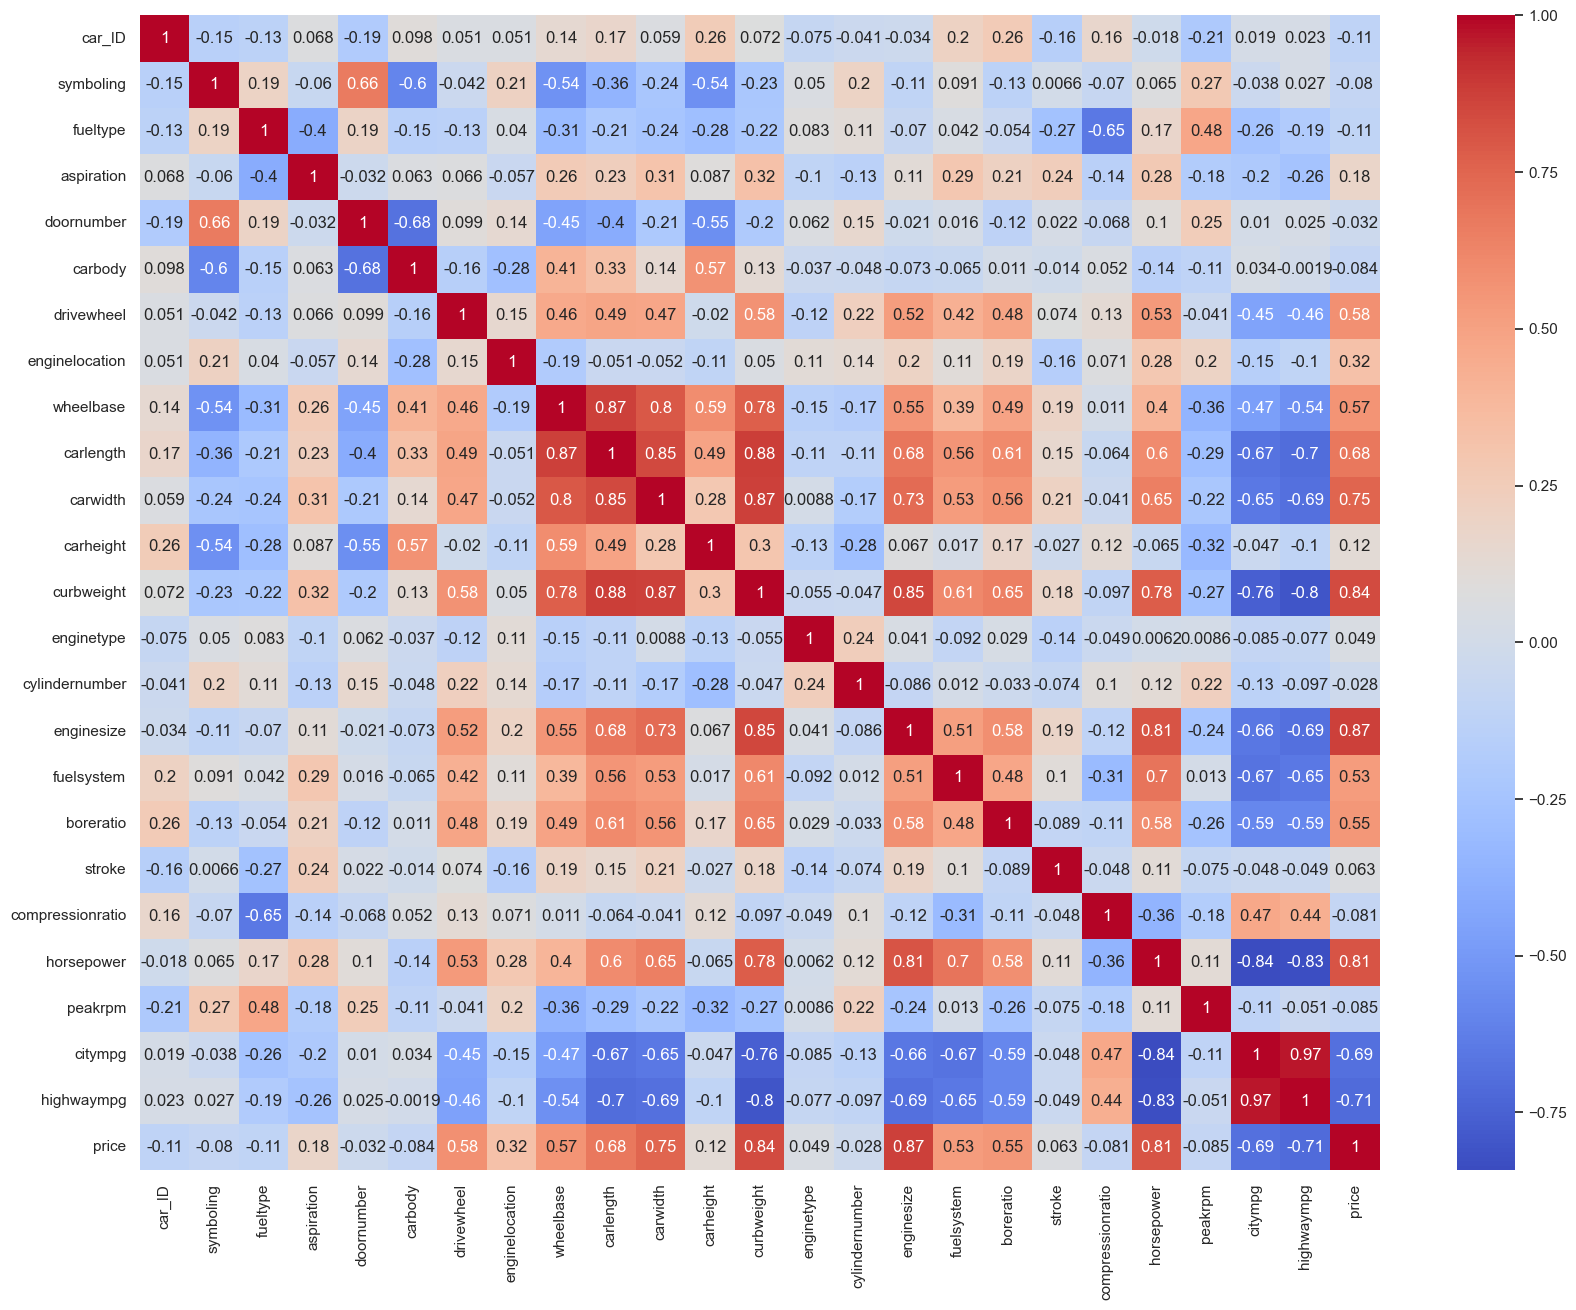

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Hence our data has multicorrelated variables hence we need to apply PCA

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(sc_x)

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
lr_model=LinearRegression()
lr_model.fit(xtrain,ytrain)
y_pred_lr=lr_model.predict(xtest)


In [18]:
mae_lr = mean_absolute_error(ytest, y_pred_lr)
mse_lr = mean_squared_error(ytest, y_pred_lr)
r2_lr = r2_score(ytest, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R-squared: {r2_lr}")

Linear Regression Evaluation:
MAE: 2490.753027288743
MSE: 14357282.012218641
R-squared: 0.8181333829688648


Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10)

# Train the model
rf_model.fit(xtrain,ytrain)

# Make predictions
y_pred_rf = rf_model.predict(xtest)
y_pred_rf

array([17046.24357679, 19784.5060943 ,  8932.84474713, 13265.83404167,
       28712.61357143,  6063.98609524,  7328.13848901,  7926.29732323,
       11578.87518182,  7392.68428571, 17903.31877976,  7686.4665    ,
       16752.69993056, 11089.27261934, 36203.375     ,  6879.02347403,
        6310.51361722, 14857.17197222,  8316.53951587, 11150.40268182,
       10761.05082172, 15339.83820238,  5983.68166667,  6615.0975    ,
        7302.49319048, 18500.75233076,  9493.31142639, 16746.88874405,
        7322.65595055, 16365.98574405, 19563.2081131 ,  6874.68662482,
        8278.83708333, 20090.23522128,  8213.68467857, 19959.3139812 ,
       10543.77860579, 12018.98      ,  6980.89527073, 14857.17197222,
        8530.02483261])

In [20]:
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(ytest, y_pred_rf)
mse_rf = mean_squared_error(ytest, y_pred_rf)
r2_rf = r2_score(ytest, y_pred_rf)

print("\nRandom Forest Regression Evaluation:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R-squared: {r2_rf}")


Random Forest Regression Evaluation:
MAE: 2460.7701324281443
MSE: 22627591.678178962
R-squared: 0.7133716850745102


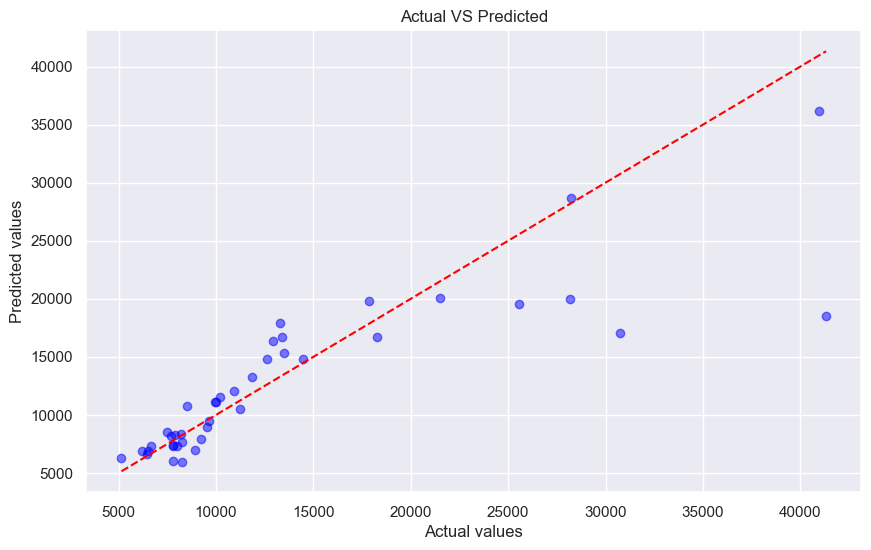

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,y_pred_rf,color="blue",alpha=0.5)
plt.plot([min(ytest),max(ytest)],[min(ytest),max(ytest)],color="red",linestyle="--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual VS Predicted")
plt.show()

In [22]:
from sklearn.linear_model import Ridge,Lasso
rd=Ridge(alpha=0.1)
rd.fit(xtrain,ytrain)
y_pred_rd=rd.predict(xtest)
print("Ridge Regression Performance:")
print(f"MAE: {mean_absolute_error(ytest, y_pred_rd)}")
print(f"MSE: {mean_squared_error(ytest, y_pred_rd)}")
print(f"R-squared: {r2_score(ytest, y_pred_rd)}")

Ridge Regression Performance:
MAE: 2490.7683792628313
MSE: 14357589.041898698
R-squared: 0.8181294937613398


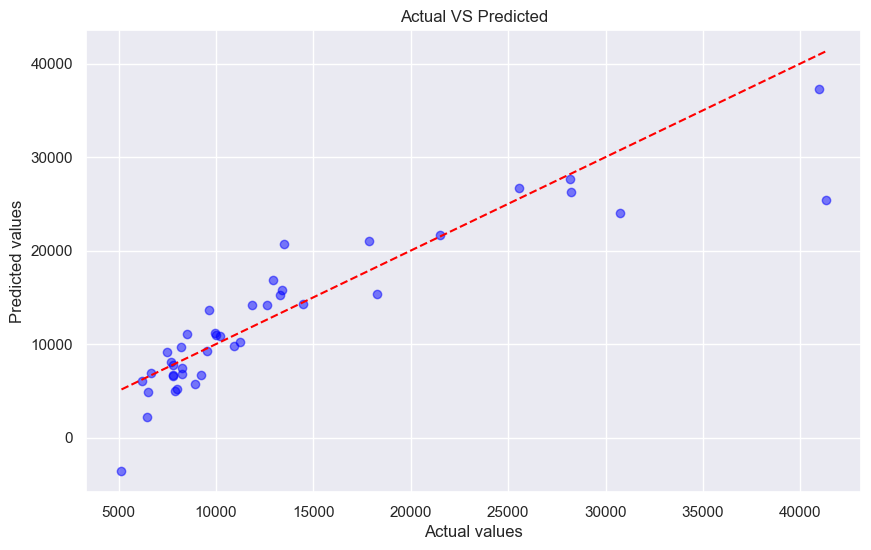

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,y_pred_rd,color="blue",alpha=0.5)
plt.plot([min(ytest),max(ytest)],[min(ytest),max(ytest)],color="red",linestyle="--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual VS Predicted")
plt.show()

In [24]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(xtrain, ytrain)

# Make predictions and evaluate Lasso
y_pred_lasso = lasso_model.predict(xtest)
print("\nLasso Regression Performance:")
print(f"MAE: {mean_absolute_error(ytest, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(ytest, y_pred_lasso)}")
print(f"R-squared: {r2_score(ytest, y_pred_lasso)}")


Lasso Regression Performance:
MAE: 2490.727661786964
MSE: 14356565.175958531
R-squared: 0.8181424632798513


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbr.fit(xtrain,ytrain)
y_pred_gb=gbr.predict(xtest)
print("\GBR Performance:")
print(f"MAE: {mean_absolute_error(ytest, y_pred_gb)}")
print(f"MSE: {mean_squared_error(ytest, y_pred_gb)}")
print(f"R-squared: {r2_score(ytest, y_pred_gb)}")

\GBR Performance:
MAE: 2202.278240941991
MSE: 15795844.472860452
R-squared: 0.7999108191241024


In [26]:
import xgboost as xgb

# Apply XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(xtrain, ytrain)

# Make predictions and evaluate XGBoost
y_pred_xgb = xgb_model.predict(xtest)
print("\nXGBoost Regression Performance:")
print(f"MAE: {mean_absolute_error(ytest, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(ytest, y_pred_xgb)}")
print(f"R-squared: {r2_score(ytest, y_pred_xgb)}")


XGBoost Regression Performance:
MAE: 2210.457971894055
MSE: 15434826.328264792
R-squared: 0.8044839095313672


In [27]:
import joblib
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(sc, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [28]:
# In your training notebook, add this before saving the model:
print("Model was trained with these features:")
print(x.columns.tolist())  # Replace X_train with your training data

Model was trained with these features:
['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [29]:
# At the end of your notebook (after all preprocessing and modeling)
import joblib

# Define categorical columns explicitly (same as used in preprocessing)
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                   'drivewheel', 'enginelocation', 'enginetype', 
                   'cylindernumber', 'fuelsystem']



# Save the categorical columns information
categorical_info = {col: list(df[col].unique()) for col in categorical_cols}
joblib.dump(categorical_info, 'categorical_info.pkl')

# Save numerical columns
numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
joblib.dump(numerical_cols, 'numerical_cols.pkl')

# Save the original column order
original_columns = df.columns.tolist()
joblib.dump(original_columns, 'original_columns.pkl')

['original_columns.pkl']